# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

623


['tsihombe',
 'lagoa',
 'bulawayo',
 'tuatapere',
 'ushuaia',
 'kodiak',
 'mahebourg',
 'jamestown',
 'port blair',
 'port elizabeth',
 'naugarzan',
 'sitka',
 'hobart',
 'yumen',
 'saleaula',
 'pevek',
 'bluff',
 'cape town',
 'altamont',
 'attawapiskat',
 'phonhong',
 'puerto baquerizo moreno',
 'kaeo',
 'osuna',
 'marcona',
 'goderich',
 'albany',
 'taolanaro',
 'talcahuano',
 'esperance',
 'nacala',
 'hermanus',
 'geraldton',
 'puerto maldonado',
 'poya',
 'new norfolk',
 'sukumo',
 'tilichiki',
 'tasiilaq',
 'elban',
 'klaksvik',
 'san policarpo',
 'las cruces',
 'dikson',
 'bredasdorp',
 'atar',
 'ust-shonosha',
 'maniitsoq',
 'luanda',
 'hilo',
 'fairbanks',
 'kayes',
 'amarante do maranhao',
 'bethel',
 'busselton',
 'rawlins',
 'sicuani',
 'amderma',
 'tigil',
 'la ronge',
 'belushya guba',
 'punta arenas',
 'karata',
 'jinji',
 'georgetown',
 'ust-kut',
 'saint-donat-de-montcalm',
 'katherine',
 'salalah',
 'vestmannaeyjar',
 'clyde river',
 'praia da vitoria',
 'tumannyy',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#initialize base url and lists
base_url= "http://api.openweathermap.org/data/2.5/weather?"
max_temp = []
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
dte= []
lat=[]
long=[]
name=[]
count=0


In [27]:
for city in cities:
    print(f'Processing Record{count} | {city} ')
    try:
        query_url=f'{base_url}q={city}&appid={weather_api_key}'
        response = requests.get(query_url).json()
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        wind_speed.append(response['wind']['speed'])
        dte.append(response['dt'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        name.append(response['name'])
    
    except:
        print("City Not Found: Skipping")
    count=count +1

Processing Record0 | tsihombe 
City Not Found: Skipping
Processing Record1 | lagoa 
Processing Record2 | bulawayo 
Processing Record3 | tuatapere 
Processing Record4 | ushuaia 
Processing Record5 | kodiak 
Processing Record6 | mahebourg 
Processing Record7 | jamestown 
Processing Record8 | port blair 
Processing Record9 | port elizabeth 
Processing Record10 | naugarzan 
City Not Found: Skipping
Processing Record11 | sitka 
Processing Record12 | hobart 
Processing Record13 | yumen 
Processing Record14 | saleaula 
City Not Found: Skipping
Processing Record15 | pevek 
Processing Record16 | bluff 
Processing Record17 | cape town 
Processing Record18 | altamont 
Processing Record19 | attawapiskat 
City Not Found: Skipping
Processing Record20 | phonhong 
Processing Record21 | puerto baquerizo moreno 
Processing Record22 | kaeo 
Processing Record23 | osuna 
Processing Record24 | marcona 
City Not Found: Skipping
Processing Record25 | goderich 
Processing Record26 | albany 
Processing Record27

Processing Record236 | port-cartier 
Processing Record237 | santa vitoria do palmar 
Processing Record238 | hobyo 
Processing Record239 | tra vinh 
Processing Record240 | kaplice 
Processing Record241 | mogwase 
Processing Record242 | saint george 
Processing Record243 | kimamba 
Processing Record244 | coquimbo 
Processing Record245 | mys shmidta 
City Not Found: Skipping
Processing Record246 | sechura 
Processing Record247 | port hardy 
Processing Record248 | tuktoyaktuk 
Processing Record249 | sao filipe 
Processing Record250 | high level 
Processing Record251 | broome 
Processing Record252 | ilinka 
City Not Found: Skipping
Processing Record253 | muros 
Processing Record254 | grand gaube 
Processing Record255 | tarudant 
City Not Found: Skipping
Processing Record256 | umzimvubu 
City Not Found: Skipping
Processing Record257 | arman 
Processing Record258 | maryville 
Processing Record259 | butaritari 
Processing Record260 | yasnyy 
Processing Record261 | bansud 
Processing Record262 

Processing Record473 | letterkenny 
Processing Record474 | beyneu 
Processing Record475 | vila 
Processing Record476 | moose factory 
Processing Record477 | delvada 
Processing Record478 | horta 
Processing Record479 | baykit 
Processing Record480 | eirunepe 
Processing Record481 | bloomingdale 
Processing Record482 | formoso do araguaia 
City Not Found: Skipping
Processing Record483 | jaciara 
Processing Record484 | cafelandia 
Processing Record485 | merrill 
Processing Record486 | etne 
Processing Record487 | macapa 
Processing Record488 | cherskiy 
Processing Record489 | hauterive 
Processing Record490 | yeniseysk 
Processing Record491 | musoma 
Processing Record492 | grand river south east 
City Not Found: Skipping
Processing Record493 | constitucion 
Processing Record494 | broken hill 
Processing Record495 | the valley 
Processing Record496 | nguiu 
City Not Found: Skipping
Processing Record497 | sibu 
Processing Record498 | provideniya 
Processing Record499 | ilulissat 
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
data_dict = {'City':name,
             'Latitude':lat,
             'Longitude':long,
             'Max Temp':max_temp,
             'Humidity':humidity,
             "Cloudiness":cloudiness,
             'Wind Speed':wind_speed,
             'Country':country,
            'Date':dte}


data_df = pd.DataFrame(data_dict)
data_df
data_df.to_csv('WeatherPy.csv')

In [31]:
data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.285378,18.353332,289.292093,73.851211,59.058824,3.459446,1.666491e+09
std,32.876175,92.014544,10.488630,18.756545,41.108261,2.523042,9.168524e+01
min,-54.800000,-179.166700,258.180000,13.000000,0.000000,0.000000,1.666491e+09
25%,-6.135275,-63.796750,281.842500,64.000000,13.250000,1.602500,1.666491e+09
50%,23.022300,19.130550,292.005000,79.000000,75.000000,2.890000,1.666491e+09
75%,47.415150,103.966650,297.537500,87.000000,100.000000,4.630000,1.666491e+09
max,78.218600,178.416700,311.790000,100.000000,100.000000,15.650000,1.666491e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#MY CITIES DONT HAVE  HUMIDITY >100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

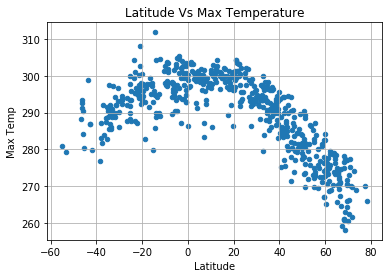

In [81]:
data_df.plot.scatter(x='Latitude', y='Max Temp')
plt.title("Latitude Vs Max Temperature")
plt.grid()
plt.savefig('lat_vs_maxtemp')
plt.show()

The above code analyzes the correlation between the latitude of different cities and the maximum temperature of those countries. We can see that the higher the latitude is, the lower the maximum tmeperature.

## Latitude vs. Humidity Plot

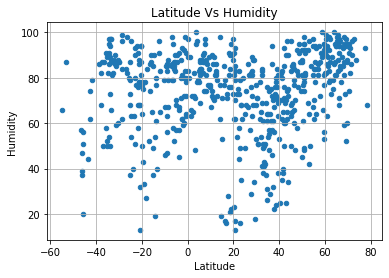

In [82]:
data_df.plot.scatter(x='Latitude', y='Humidity')
plt.title("Latitude Vs Humidity")
plt.grid()
plt.savefig('lat_vs_humidity')
plt.show()

The above code analyzes the correlation between the latitude of different cities and the humidity of those countries. We can see that there seems to be a weak positive correlation between the latitude and the humidity.

## Latitude vs. Cloudiness Plot

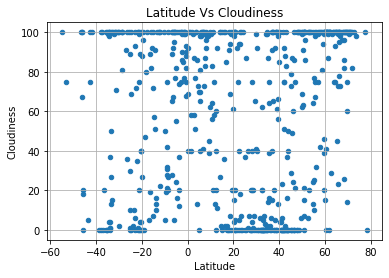

In [83]:
data_df.plot.scatter(x='Latitude', y='Cloudiness')
plt.title("Latitude Vs Cloudiness")
plt.grid()
plt.savefig('lat_vs_cloudiness')
plt.show()

The above code analyzes the correlation between the latitude of different cities and the cloudiness of those countries. We can see that there seems to be no correlation between the latitude and the cloudiness.

## Latitude vs. Wind Speed Plot

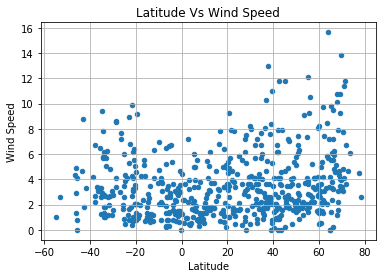

In [84]:
data_df.plot.scatter(x='Latitude', y='Wind Speed')
plt.title("Latitude Vs Wind Speed")
plt.grid()
plt.savefig('lat_vs_wind')
plt.show()

The above code analyzes the correlation between the latitude of different cities and the wind speed of those countries. We can see that there seems to be no correlation between the latitude and the wind speed.

## Linear Regression

In [39]:
n_hemisphere = data_df.loc[data_df["Latitude"]>=0]
s_hemisphere = data_df.loc[data_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R values is -0.8824577321148988


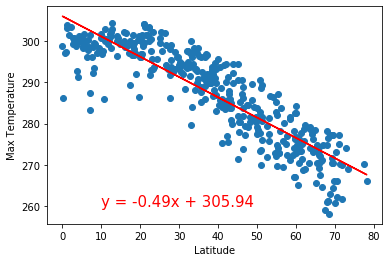

In [85]:
x_values = n_hemisphere["Latitude"]
y_values = n_hemisphere["Max Temp"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"R values is {correlation[0]}")
plt.savefig('northhem_lat_vs_maxtemp')
plt.show()

The linear regression is modeling the negative correlation between the latitude and max temperature for cities in the northern hemiphere. The correlation between the two variables seems to be very strong. A observation for this graph is that the higher the latitude gets, the lower the maximum temperature is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R values is 0.6204432737602801


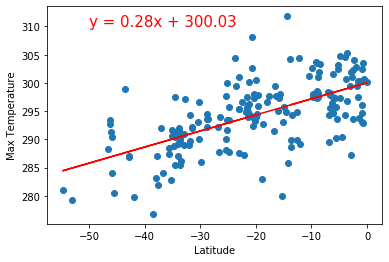

In [86]:
x_values = s_hemisphere["Latitude"]
y_values = s_hemisphere["Max Temp"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,310),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"R values is {correlation[0]}")
plt.savefig('southhem_lat_vs_maxtemp')
plt.show()

The linear regression is modeling the positive correlation between the latitude and max temperature for cities in the southern hemiphere. The correlation between the two variables seems to be strong. A observation for this graph is that the higher the latitude gets to 0, the higher the maximum temperature is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R values is 0.22806111510676302


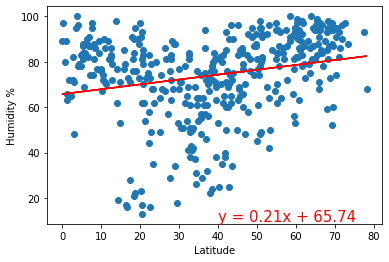

In [87]:
x_values = n_hemisphere["Latitude"]
y_values = n_hemisphere["Humidity"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"R values is {correlation[0]}")
plt.savefig('northhem_lat_vs_humidity')
plt.show()

The linear regression is modeling the positive correlation between the latitude and humidity for cities in the northern hemiphere. The correlation between the two variables seems to be weak. A observation for this graph is that the higher the latitude gets, the humidity slightly goes up.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R values is 0.09073661150981574


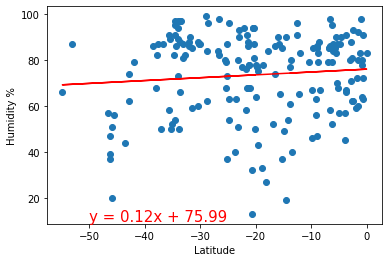

In [88]:
x_values = s_hemisphere["Latitude"]
y_values = s_hemisphere["Humidity"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"R values is {correlation[0]}")
plt.savefig('southhem_lat_vs_humidity')
plt.show()

The linear regression is modeling the positive correlation between the latitude and humidity for cities in the southern hemiphere. The correlation between the two variables seems to be very weak. A observation for this graph is that the higher the latitude gets to 0, the humidity very slightly goes up.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R values is 0.2037956513592561


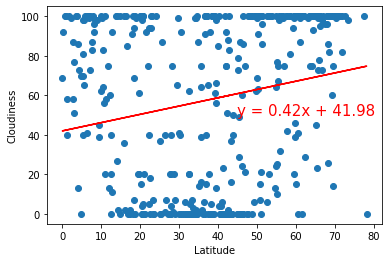

In [89]:
x_values = n_hemisphere["Latitude"]
y_values = n_hemisphere["Cloudiness"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R values is {correlation[0]}")
plt.savefig('northhem_lat_vs_cloud')
plt.show()

The linear regression is modeling the positive correlation between the latitude and cloudiness for cities in the northern hemiphere. The correlation between the two variables seems to be weak. A observation for this graph is that the higher the latitude gets, the cloudiness slightly goes up.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R values is 0.1272952752891053


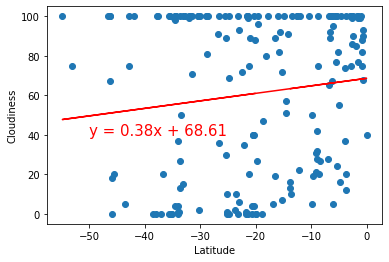

In [90]:
x_values = s_hemisphere["Latitude"]
y_values = s_hemisphere["Cloudiness"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R values is {correlation[0]}")
plt.savefig('southhem_lat_vs_cloud')
plt.show()

The linear regression is modeling the positive correlation between the latitude and cloudiness for cities in the southern hemiphere. The correlation between the two variables seems to be very weak. A observation for this graph is that the higher the latitude gets to 0, the cloudiness barely goes up.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R values is 0.2587316903753073


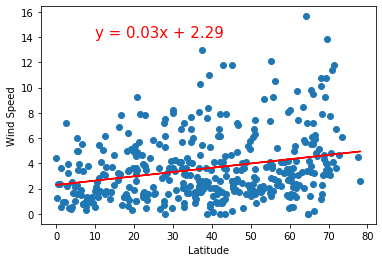

In [91]:
x_values = n_hemisphere["Latitude"]
y_values = n_hemisphere["Wind Speed"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R values is {correlation[0]}")
plt.savefig('northhem_lat_vs_wind')
plt.show()

The linear regression is modeling the positive correlation between the latitude and wind speed for cities in the northern hemiphere. The correlation between the two variables seems to be weak. A observation for this graph is that the higher the latitude gets, the wind speed slightly goes up.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R values is -0.2030132612288436


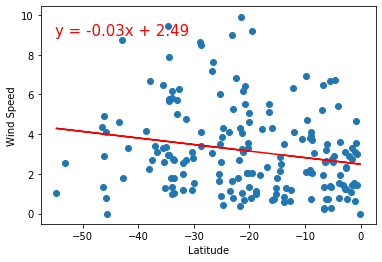

In [92]:
x_values = s_hemisphere["Latitude"]
y_values = s_hemisphere["Wind Speed"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R values is {correlation[0]}")
plt.savefig('southhem_lat_vs_wind')
plt.show()

The linear regression is modeling the negative correlation between the latitude and wind speed for cities in the southen hemiphere. The correlation between the two variables seems to be weak. A observation for this graph is that the higher the latitude gets, the cloudiness slightly goes down.